In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
sns.set_style('darkgrid')
sns.set_context('poster', font_scale=0.5)

In [5]:
califonia = fetch_california_housing()

In [6]:
califonia.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(califonia['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [8]:
print(califonia['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
print(califonia['data'])

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [10]:
df = pd.DataFrame(data=califonia['data'], columns=califonia['feature_names'])

In [11]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

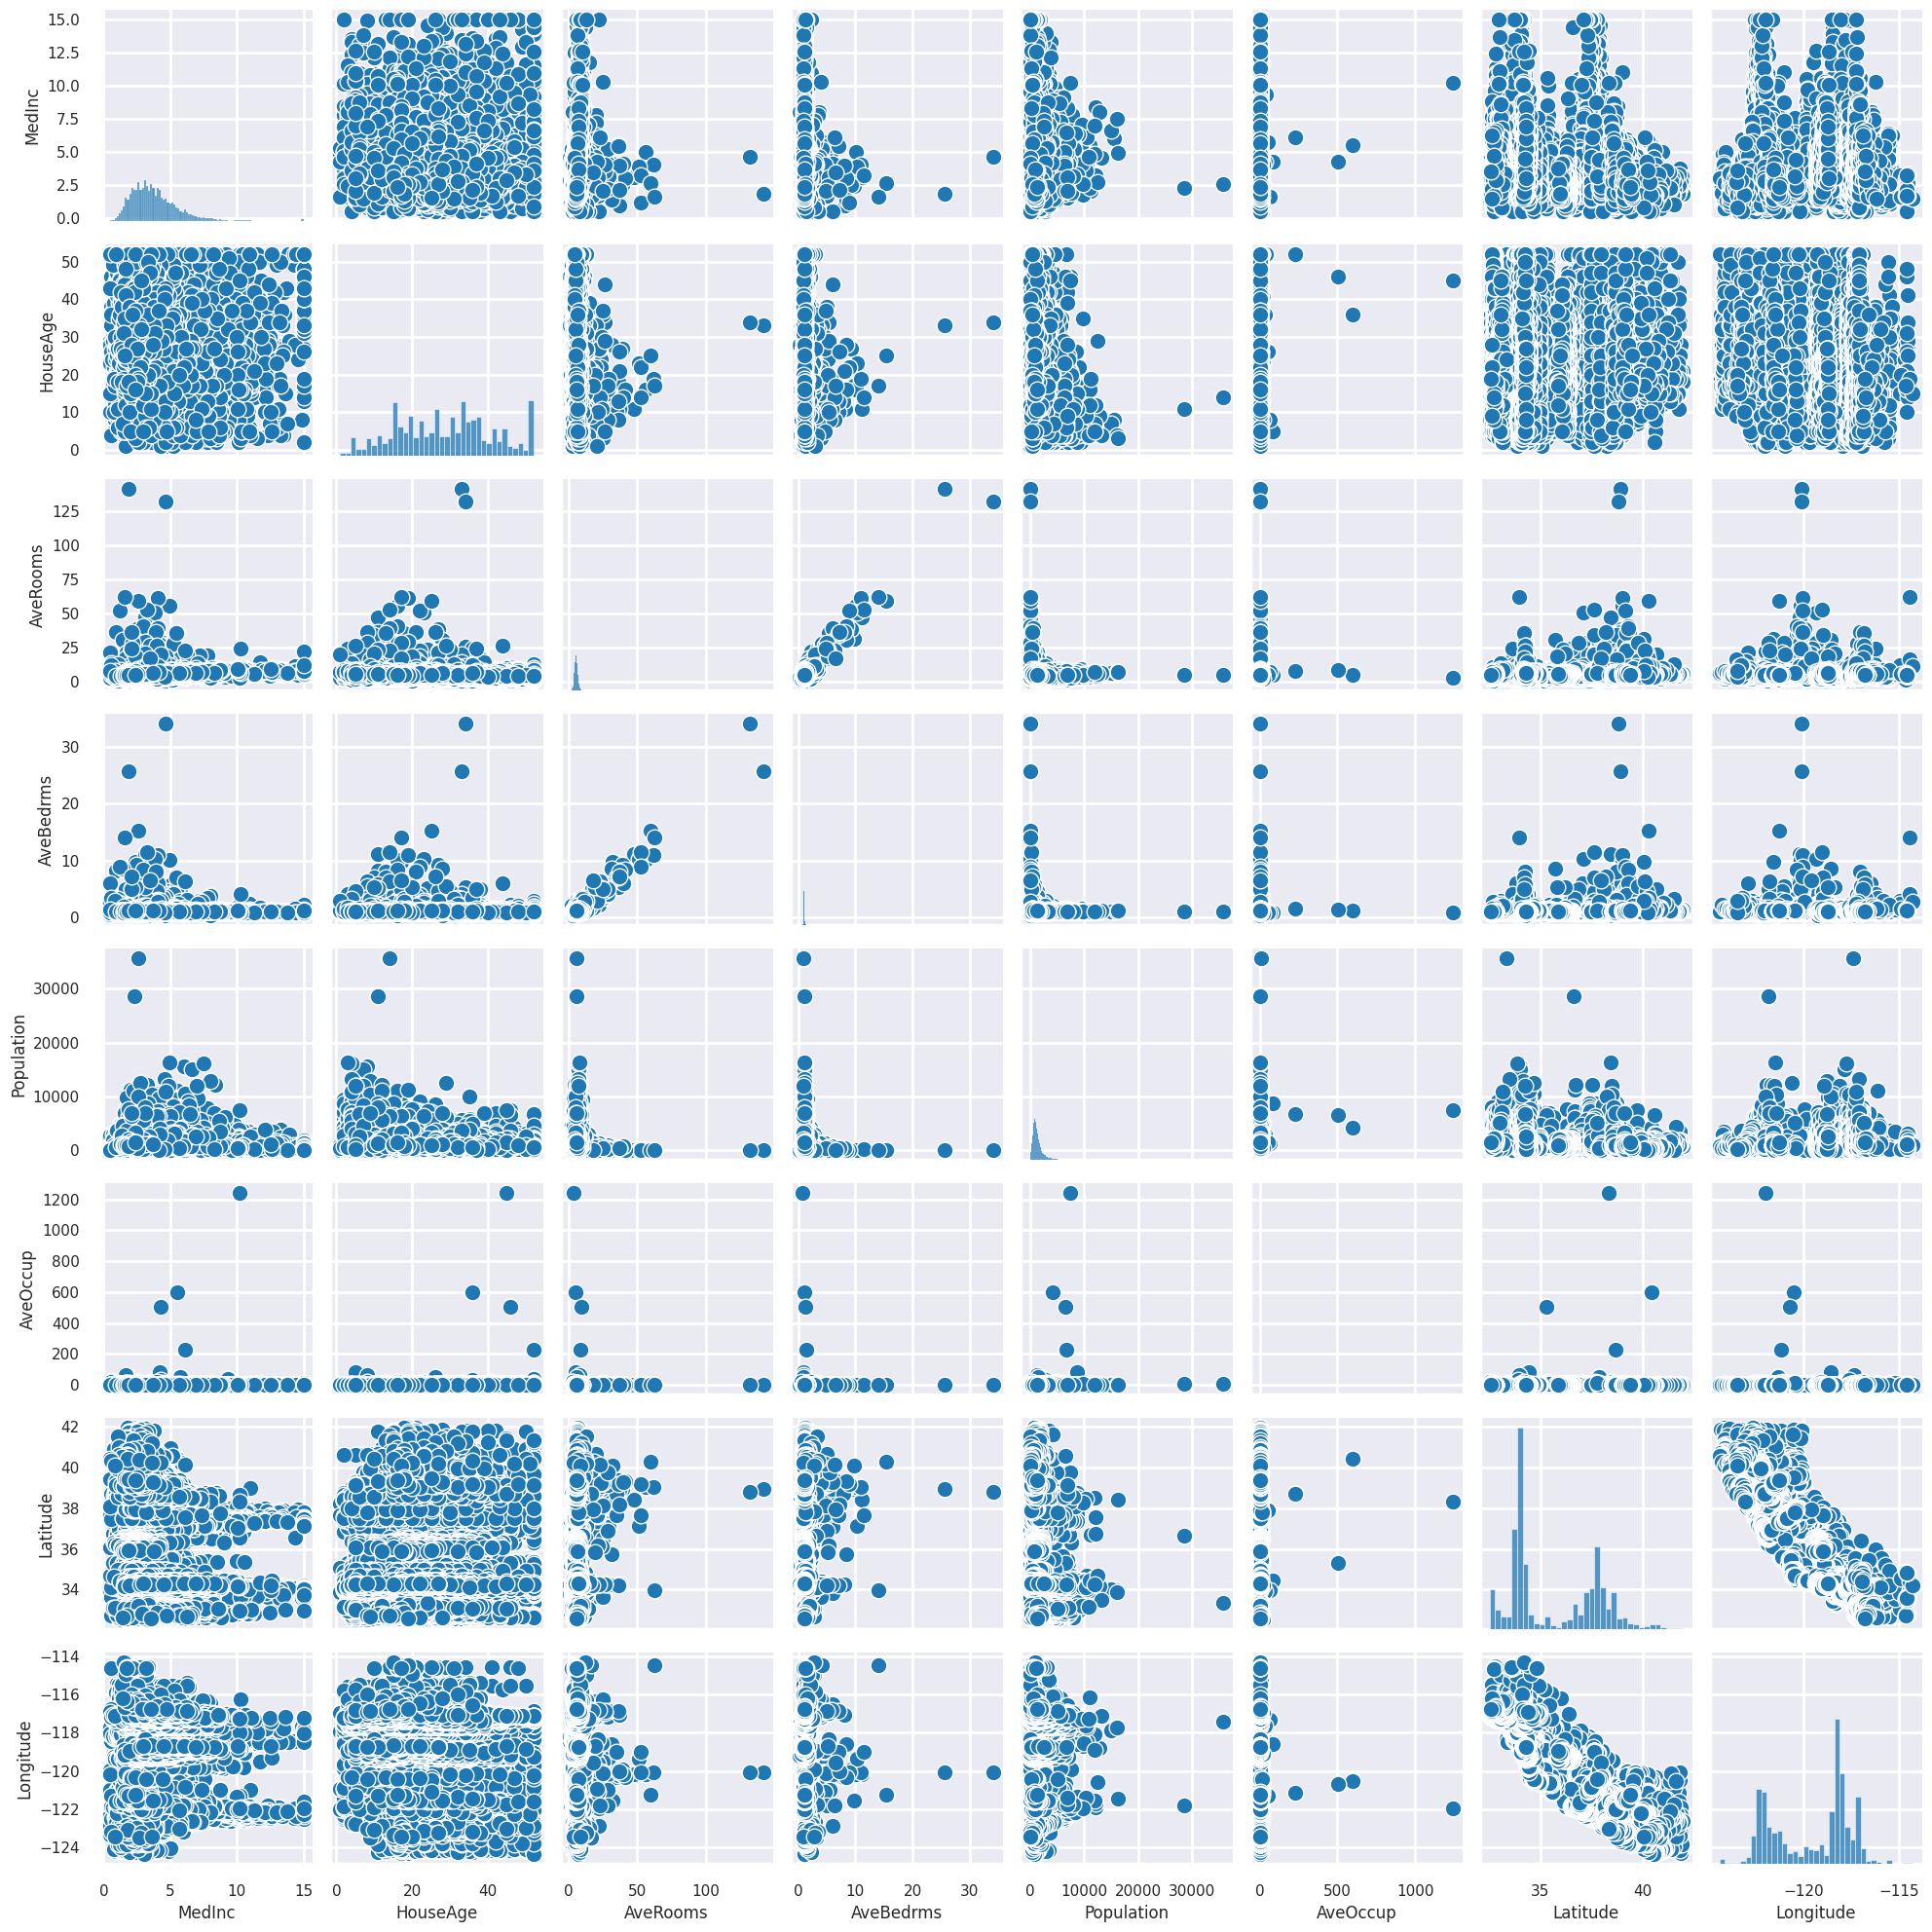

In [12]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

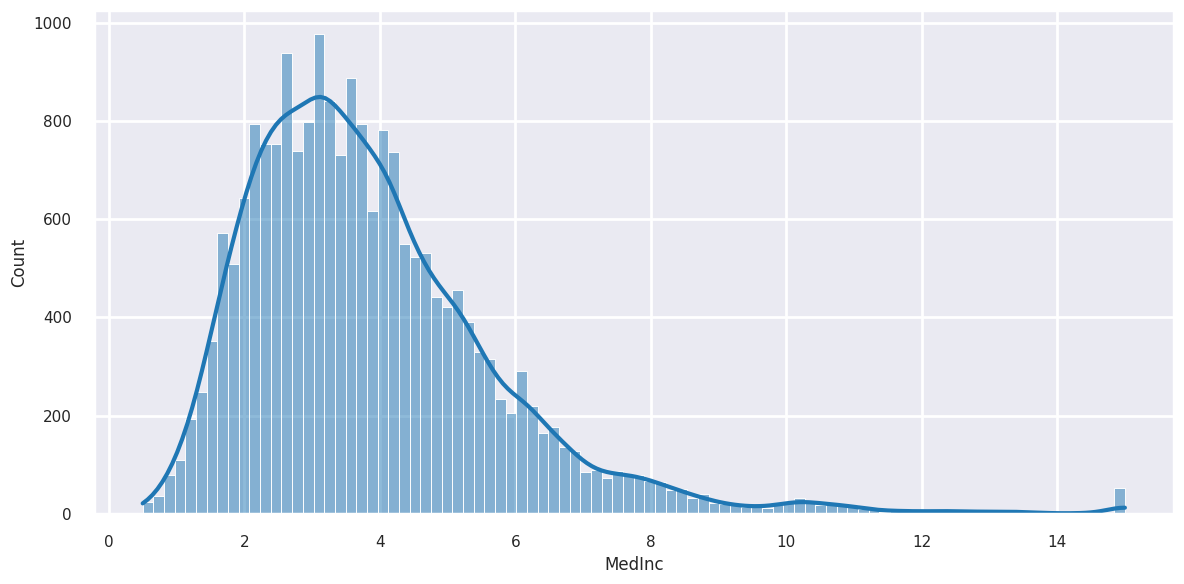

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(df['MedInc'], kde=True)
plt.tight_layout()
plt.show()

In [14]:
df.corr(numeric_only=True)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000

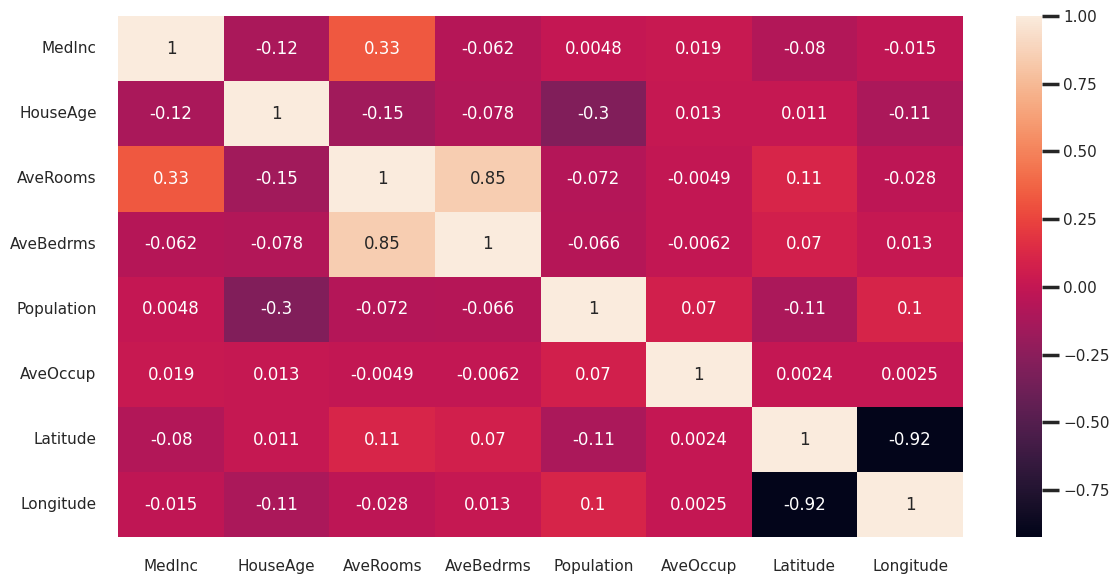

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.show()

In [16]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [17]:
X = df[['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

In [18]:
y = df['MedInc']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [21]:
lm = LinearRegression()

In [22]:
lm

LinearRegression()

In [23]:
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
print(lm.intercept_)

-53.821222995354326


In [25]:
print(lm.coef_)

[-8.86567719e-03  1.11050032e+00 -4.56609995e+00  3.99394504e-06
 -8.44722345e-02 -7.36570934e-01 -6.97604453e-01]


In [26]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])

In [27]:
cdf

Coef
HouseAge   -0.008866
AveRooms    1.110500
AveBedrms  -4.566100
Population  0.000004
AveOccup   -0.084472
Latitude   -0.736571
Longitude  -0.697604

In [28]:
## Prediction

In [29]:
prediction = lm.predict(X_test)

In [30]:
prediction

array([5.62280576, 7.42082262, 3.5497201 , ..., 6.62528959, 4.48743341,
       5.29064754])

In [31]:
y_test

16086     5.6204
8816     11.6677
7175      2.4375
16714     4.3218
14491    10.0707
          ...   
14439     2.4671
10823     0.9702
17019     5.5902
836       4.3875
10476     5.4622
Name: MedInc, Length: 8256, dtype: float64

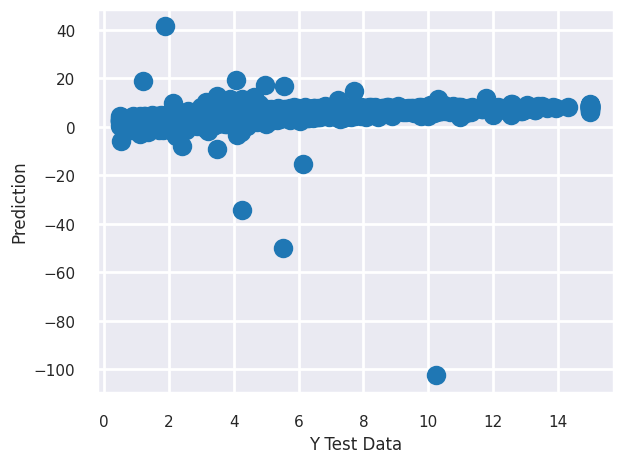

In [32]:
plt.scatter(y_test,prediction)
plt.xlabel("Y Test Data")
plt.ylabel("Prediction")
plt.tight_layout()
plt.show()

In [34]:
# #Lost Function / Regression Evaluation Metrics

In [35]:
from sklearn import metrics

In [36]:
metrics.mean_absolute_error(y_test, prediction)

0.8339897014837648

In [37]:
metrics.mean_squared_error(y_test, prediction)

3.7936886166351256

In [38]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

1.9477393605498468

In [39]:
## Residuals

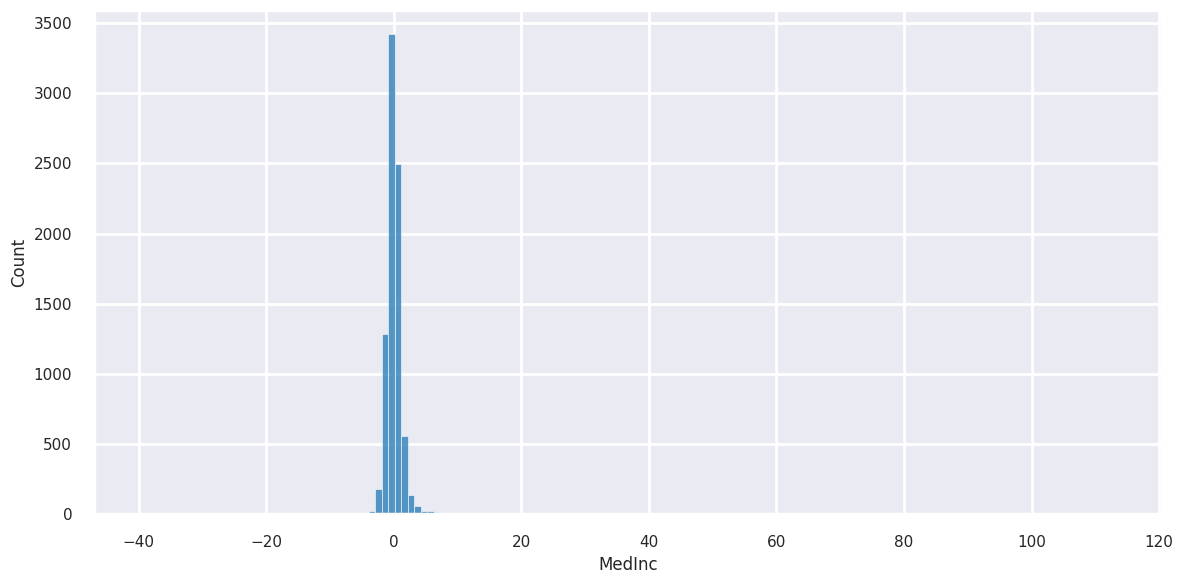

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(y_test-prediction, bins=150)
plt.tight_layout()
plt.show()